In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

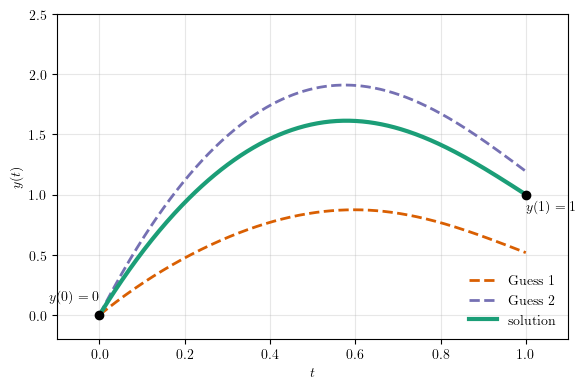

In [2]:
def ode(t, y):
    return [y[1], -2.0 * y[1] - 5.0 * y[0] + 2.0 * np.sin(2.0 * np.pi * t)]

def residual(slope):
    sol = solve_ivp(ode, (0.0, 1.0), [0.0, slope], t_eval=[1.0])
    return sol.y[0, -1] - 1.0

root = root_scalar(residual, x0=0.0, x1=5.0, method="secant")
s_star = root.root
s_guess1 = 0.5 * s_star
s_guess2 = 1.2 * s_star

t_eval = np.linspace(0.0, 1.0, 400)

def integrate_solution(slope):
    sol = solve_ivp(ode, (0.0, 1.0), [0.0, slope], t_eval=t_eval)
    return sol.t, sol.y[0]

t1, y1 = integrate_solution(s_guess1)
t2, y2 = integrate_solution(s_guess2)
t_star, y_star = integrate_solution(s_star)

fig, ax = plt.subplots(figsize=(6, 4))

color_guess1 = "#d95f02"
color_guess2 = "#7570b3"
color_solution = "#1b9e77"

ax.plot(t1, y1, "--", linewidth=2, label="Guess 1", color=color_guess1)
ax.plot(t2, y2, "--", linewidth=2, label="Guess 2", color=color_guess2)
ax.plot(t_star, y_star, "-", linewidth=3, label="solution", color=color_solution)

ax.scatter([0.0], [0.0], zorder=3, color="black")
ax.scatter([1.0], [1.0], zorder=3, color="black")

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.5)

ax.text(-0.0, 0.15, r"$y(0)=0$", ha="right", va="center")
ax.text(1.0, 0.90, r"$y(1)=1$", ha="left", va="center")

ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$y(t)$")
# ax.set_title(r"Shooting method for $y''+2y'+5y=2\sin(2\pi t)$, $y(0)=0$, $y(1)=1$")
ax.legend(loc="lower right", frameon=False)
ax.grid(True, alpha=0.3)
fig.tight_layout()
plt.savefig('../../../figs/ode/shooting.pdf', transparent=True, bbox_inches='tight')
plt.show()


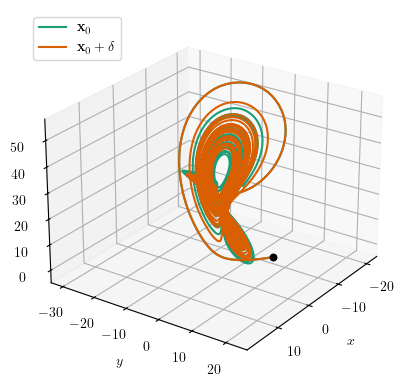

In [3]:
def lorenz(t, state):
    x, y, z = state
    return [
        10.0 * (y - x),
        x * (30.0 - z) - y,
        x * y - 2.0 * z,
    ]

t_span = (0.0, 40.0)
t_eval = np.linspace(t_span[0], t_span[1], 8000)

x0 = [-8.0, 8.0, -0.0023]
x0_perturbed = [-8.0, 8.0, -0.0024]

sol1 = solve_ivp(lorenz, t_span, x0, t_eval=t_eval)
sol2 = solve_ivp(lorenz, t_span, x0_perturbed, t_eval=t_eval)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection="3d")

color1 = "#1b9e77"
color2 = "#d95f02"

ax.plot(sol1.y[0], sol1.y[1], sol1.y[2], linewidth=1.5, color=color1, label=r"$\mathbf{x}_0$")
ax.plot(sol2.y[0], sol2.y[1], sol2.y[2], linewidth=1.5, color=color2, label=r"$\mathbf{x}_0+\delta$")

ax.scatter([x0[0]], [x0[1]], [x0[2]], color="black", s=20)
ax.scatter([x0_perturbed[0]], [x0_perturbed[1]], [x0_perturbed[2]], color="black", s=20)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
# ax.set_title("Sensitivity in the Lorenz system")
ax.legend(loc="upper left")
ax.view_init(elev=25, azim=35)

fig.tight_layout()
plt.savefig("../../../figs/ode/lorenz_sensitivity.pdf", bbox_inches="tight", transparent=True)
plt.show()
